<a href="https://colab.research.google.com/github/RMoulla/PBD_Paris/blob/main/TP_seloger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travaux Pratiques : analyse et prédiction des prix de biens immobiliers

Étude d'un jeu de données comportant des informations immobilières provenant du site seloger.com.

Dans un premier temps, nous nous proposons de faire une étude exploratoire pour se familiariser avec la donnée et comprendre comment les variables se comportent. Cette étape permettra egalement de débusquer d'eventuelles anomalies et de nettoyer la donnée si nécessaire.

Dans un second temps, nous nous attacherons à l'explicabilité des données, c'est à dire répondre à la question "Quelles sont les variables les plus importantes pour expliquer le prix d'un bien ?"

Finalement, nous entrainerons des modèles de Machine Learning sur des données d'entrainement et nous prédirons sur des données de test afin d'évaluer les performances du modèles.


In [ ]:
# Import des librairies

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 25)

In [ ]:
file_path = 'selogerdata.csv'
dataset = pd.read_csv(file_path)

# Analyse exploratoire des données

In [ ]:
dataset.shape

(8899, 24)

Le jeu de données contient 8899 lignes et 24 colonnes.

In [ ]:
# Visualiser les 10 premières lignes du dataset
dataset.head(10)

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
0,11,750116,75016,75016,0,178817,144013899,227883,0,0,√©quip√©e,SL,1,2,13,3,11,59000,1,0,0,69.00,Appartement,Paris 16√®me
1,8,750110,75010,75010,0,12089,149750677,3765,0,0,aucune,SL,1,2,7,1,8,77500,0,0,0,8.49,Appartement,Paris 10√®me
2,6,750118,75018,75018,0,115811,138648733,108873,0,0,aucune,SL,1,1,8,2,6,94000,0,0,0,37.00,Appartement,Paris 18√®me
3,16,750110,75010,75010,0,12089,149750679,3765,0,0,aucune,SL,1,2,4,1,16,96000,0,0,0,10.26,Appartement,Paris 10√®me
4,4,750116,75016,75016,0,97567,147153067,145098,0,0,0,SL,1,1,5,2,4,100000,0,0,0,14.93,Appartement,Paris 16√®me
5,0,770288,77000,77000,0,274799,149790411,302393,0,0,√©quip√©e,SL,1,1,5,2,0,110000,0,0,0,38.65,Appartement,Melun
6,2,910174,91100,91100,0,2855,140705709,13760,0,0,0,SL,1,1,12,2,2,110000,1,0,0,41.57,Appartement,Corbeil Essonnes
7,14,750116,75016,75016,0,89064,145549111,6151,0,0,√©quip√©e,SL,1,1,6,3,14,110000,1,0,0,72.00,Appartement,Paris 16√®me
8,6,910223,91150,91150,0,252611,150029235,275082,0,0,coin cuisine √©quip√©,SL,1,1,8,2,6,111000,1,0,0,43.00,Appartement,√âtampes
9,3,780314,78440,78440,0,292153,145288899,334060,0,0,coin cuisine,SL,1,2,7,3,3,111000,0,0,0,48.00,Appartement,Issou


On peut d'ores et déjà remarquer que les colonnes `idtypecyuisine` et `ville` doivent etre nettoyées

In [ ]:
# Afficher le nom des colonnes du dataset
dataset.columns

Index(['number', 'codeinsee', 'codepostal', 'cp', 'etage', 'idagence',
       'idannonce', 'idtiers', 'idtypechauffage', 'idtypecommerce',
       'idtypecuisine', 'idtypepublicationsourcecouplage', 'naturebien',
       'nb_chambres', 'nb_photos', 'nb_pieces', 'position', 'prix',
       'si_balcon', 'si_sdEau', 'si_sdbain', 'surface', 'typedebien', 'ville'],
      dtype='object')

Notre but est de prédire la variable `prix` à partir des autres variables.  Ces dernières ne sont sans doute pas toutes utiles. Il faudrait donc les analyser pour statuer sur leur pertinence.

In [ ]:
dataset.describe()

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface
count,8899.000000,8899.000000,8899.000000,8899.000000,8899.0,8899.000000,8.899000e+03,8899.000000,8899.0,8899.0,8899.000000,8899.000000,8899.000000,8899.000000,8899.000000,8.899000e+03,8899.000000,8899.0,8899.0,8899.000000
mean,9.531296,751745.680189,75186.144735,75186.144735,0.0,124110.094280,1.473531e+08,136989.252500,0.0,0.0,1.638723,2.319474,9.697269,3.838746,9.531296,1.210579e+06,0.271716,0.0,0.0,96.070707
std,5.765614,16287.896954,1660.091189,1660.091189,0.0,104338.907661,3.661055e+06,109732.960794,0.0,0.0,0.931184,1.170877,4.511174,1.483164,5.765614,4.462923e+05,0.444869,0.0,0.0,38.127731
min,0.000000,750101.000000,75001.000000,75001.000000,0.0,33.000000,7.437284e+07,98.000000,0.0,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,5.900000e+04,0.000000,0.0,0.0,0.000000
25%,5.000000,750108.000000,75008.000000,75008.000000,0.0,39738.000000,1.463174e+08,26516.000000,0.0,0.0,1.000000,1.000000,6.000000,3.000000,5.000000,7.950000e+05,0.000000,0.0,0.0,66.400000
50%,10.000000,750114.000000,75014.000000,75014.000000,0.0,93920.000000,1.486361e+08,123925.000000,0.0,0.0,1.000000,2.000000,9.000000,4.000000,10.000000,1.475000e+06,0.000000,0.0,0.0,93.000000
75%,15.000000,750116.000000,75017.000000,75017.000000,0.0,203657.000000,1.495161e+08,213489.000000,0.0,0.0,3.000000,3.000000,12.000000,5.000000,15.000000,1.490000e+06,1.000000,0.0,0.0,129.000000
max,19.000000,950500.000000,95880.000000,95880.000000,0.0,362103.000000,1.502498e+08,425123.000000,0.0,0.0,3.000000,22.000000,27.000000,53.000000,19.000000,2.000000e+06,1.000000,0.0,0.0,250.000000


On observe qu'il n'y a pas de valeurs manquantes à traiter.  
Par ailleurs, il y a 3 format de données:
- int64: nombres entiers relatifs
- object: texte
- float64: nombres décimaux

# Nettoyage des données

In [ ]:
# Afficher la fréquence des types de cuisine.
dataset['idtypecuisine'].value_counts()

s√©par√©e                2073
0                        1997
s√©par√©e √©quip√©e      1418
aucune                   1406
am√©ricaine √©quip√©e     748
√©quip√©e                 526
am√©ricaine               420
coin cuisine              186
coin cuisine √©quip√©     114
-1                         11
Name: idtypecuisine, dtype: int64

Que signifient les valeurs 0 et -1 ?
On serait tenté de penser que 0 corresond à la situation ou il n'y a pas de cuisine mais, en observant les données, il s'avère que ce n'est pas le cas. Nous allons créer des groupes à part pour ces catégories


In [ ]:
# Correction des données
mapper = {
    's√©par√©e': 'séparée',
    '0': 'categorie_0',
    's√©par√©e √©quip√©e': 'séparée équipée',
    'aucune': 'aucune',
    'am√©ricaine √©quip√©e': 'américaine équipée',
    '√©quip√©e': 'équipée',
    'am√©ricaine': 'américaine',
    'coin cuisine': 'coin cuisine',
    'coin cuisine √©quip√©': 'coin cuisine équipé',
    '-1': 'catégorie_1'
}

In [ ]:
# Appliquer les corrections
dataset['idtypecuisine'] = dataset['idtypecuisine'].map(mapper)

In [ ]:
dataset['idtypecuisine'].value_counts()

séparée                2073
categorie_0            1997
séparée équipée        1418
aucune                 1406
américaine équipée      748
équipée                 526
américaine              420
coin cuisine            186
coin cuisine équipé     114
catégorie_1              11
Name: idtypecuisine, dtype: int64

In [ ]:
# Afficher les 10 premières villes
dataset['ville'].unique()[:10]

array(['Paris 16√®me', 'Paris 10√®me', 'Paris 18√®me', 'Melun',
       'Corbeil Essonnes', '√âtampes', 'Issou', 'Limay', '√âvry', 'Avon'],
      dtype=object)

In [ ]:
# Corriger les accents
dataset['ville'] =  (
    dataset['ville']
    .str.replace('√®', 'è')
    .str.replace('√â', 'É')
)

In [ ]:
dataset['ville'].unique()[:10]

array(['Paris 16ème', 'Paris 10ème', 'Paris 18ème', 'Melun',
       'Corbeil Essonnes', 'Étampes', 'Issou', 'Limay', 'Évry', 'Avon'],
      dtype=object)

# Analyse de la cardinalité des features

In [ ]:
# Combien de valeurs uniques possède chaque colonne ?
dataset.nunique().sort_values()

si_sdbain                             1
si_sdEau                              1
etage                                 1
idtypechauffage                       1
idtypecommerce                        1
si_balcon                             2
typedebien                            2
idtypepublicationsourcecouplage       3
naturebien                            3
nb_chambres                           7
nb_pieces                             9
idtypecuisine                        10
position                             20
number                               20
nb_photos                            27
cp                                  105
codepostal                          105
codeinsee                           107
ville                               112
prix                               1052
surface                            1218
idagence                           1413
idtiers                            1413
idannonce                          3815
dtype: int64

- Les variables `si_sdbain`, `si_sdEau`, `etage`, `idtypechauffage`, `idtypecommerce` ne comportent qu'une unique valeur (0) ; il n'est donc pas utile de les garder car elles n'aident pas à la prédiction.      

- `cp` et `codepostal` semblent représenter la même variable. Si tel est le cas, alors il ne faut en garder qu'une seule.
Par ailleurs, `codeinsee` et `ville` semblent véhiculer plus ou moins la même information. En première approximation, nous ne garderons qu'une seule de ces 4 variables.

- Pour `position` et `number`, il n'est pas évident de conclure, mais les deux colonnes représentent également la même variable.

- Le même constat peyt être fait pour les colonnes `idagence` et `idtiers`.


In [ ]:
# Les colonnes sont identiques, on ne va en garder qu'une seule.
dataset['cp'].equals(dataset['codepostal'])

True

In [ ]:
# Les colonnes sont identiques, on ne va en garder qu'une seule.
dataset['position'].equals(dataset['number'])

True

In [ ]:
# Les colonnes ne continennt pas les mêmes valeurs
dataset['idtiers'].equals(dataset['idagence'])

False

In [ ]:
# Il est possible que idtiers et idagence comportent la même information retranscrite de manière différente.
dataset[['idtiers', 'idagence']].head()

,idtiers,idagence
0,227883,178817
1,3765,12089
2,108873,115811
3,3765,12089
4,145098,97567


In [ ]:
# regardons ce qui se passe avec les élèments de la ligne 2 - colonne idtiers
(dataset['idtiers'] == 108873).sum()

4

In [ ]:
# regardons ce qui se passe avec les élèments de la ligne 2 - colonne idagence
(dataset['idagence'] == 115811).sum()

4

L'information semble bien la même. Vérifions cependant si les fréquences des modalités sont identiques pour les deux colonnes.

In [ ]:
dataset['idtiers'].value_counts()

221404    235
169816    229
265828    217
6601      214
140505    210
         ... 
60250       1
268860      1
171835      1
157624      1
324713      1
Name: idtiers, Length: 1413, dtype: int64

In [ ]:
dataset['idagence'].value_counts()

252492    235
113840    229
240271    217
11024     214
93920     210
         ... 
50140       1
238353      1
115806      1
105410      1
282901      1
Name: idagence, Length: 1413, dtype: int64

In [ ]:
# Les variables sont bien identiques !
idtiers = dataset['idtiers'].value_counts().reset_index(drop = True)
idagence = dataset['idagence'].value_counts().reset_index(drop = True)

idtiers.equals(idagence)

True

In [ ]:
# Bilan des variables à supprimer
to_remove = [
    'si_sdbain', 'si_sdEau', 'etage',
    'idtypechauffage', 'idtypecommerce', 'codepostal',
    'number', 'idtiers', 'cp', 'codeinsee']

Il est également nécessaire de distinguer les variables quantitatives des variables catégorielles car elles ne seront pas traitées de la même manière.

In [ ]:
categorical = [
    'si_balcon', 'typedebien', 'idtypepublicationsourcecouplage',
    'naturebien','idtypecuisine', 'codeinsee', 'cp',
    'ville', 'idagence', 'idannonce', 'position'
]

numerical = [
    'nb_chambres', 'nb_pieces', 'nb_photos', 'surface'

]

## Analyse exploratoire des données

On commence d'abord par analyser la variable cible.

<ipython-input-26-c90e97d1e718>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset['prix'], shade=True);


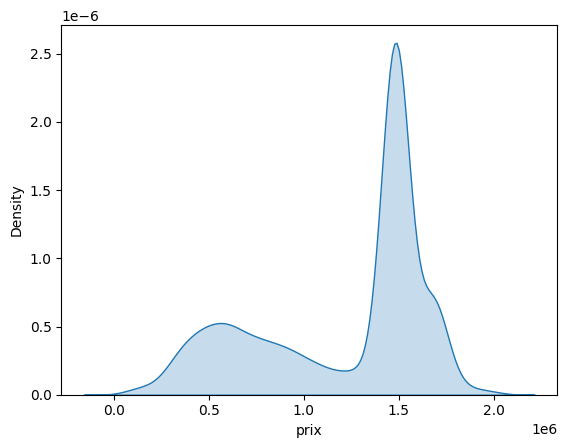

In [ ]:
sns.kdeplot(dataset['prix'], shade=True);

La distribution des prix présente un pic anormalement élevé autour de la valeur 1 500 000 euros. Cela semble très suspect car on ne voit pas d'explication métier évidente à cette anomalie. Regardons les données de plus près.

In [ ]:
idanonce_counts = dataset['idannonce'].value_counts()
display(idanonce_counts)
idanonce_counts.values[:100]

148873133    202
150076313    202
149440453    202
147709067    202
148767581    202
            ... 
150023825      1
146139955      1
148608603      1
148460561      1
148377757      1
Name: idannonce, Length: 3815, dtype: int64

array([202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202, 202,
       202, 202, 202, 202, 202, 202, 202,  53,  53,  53,  53,  53,  53,
        53,  53,  53,  53,  53,  53,  53,  53,  53,  53,  53,  53,  53,
        53,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1])

In [ ]:
dataset.drop_duplicates()

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
0,11,750116,75016,75016,0,178817,144013899,227883,0,0,√©quip√©e,SL,1,2,13,3,11,59000,1,0,0,69.00,Appartement,Paris 16√®me
1,8,750110,75010,75010,0,12089,149750677,3765,0,0,aucune,SL,1,2,7,1,8,77500,0,0,0,8.49,Appartement,Paris 10√®me
2,6,750118,75018,75018,0,115811,138648733,108873,0,0,aucune,SL,1,1,8,2,6,94000,0,0,0,37.00,Appartement,Paris 18√®me
3,16,750110,75010,75010,0,12089,149750679,3765,0,0,aucune,SL,1,2,4,1,16,96000,0,0,0,10.26,Appartement,Paris 10√®me
4,4,750116,75016,75016,0,97567,147153067,145098,0,0,0,SL,1,1,5,2,4,100000,0,0,0,14.93,Appartement,Paris 16√®me
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8894,6,750108,75008,75008,0,58124,148425017,60546,0,0,s√©par√©e,BD,3,2,8,4,6,1995000,0,0,0,125.00,Appartement,Paris 8√®me
8895,7,750116,75016,75016,0,200457,147735057,249378,0,0,aucune,BD,3,6,4,7,7,1995000,0,0,0,200.00,Appartement,Paris 16√®me
8896,3,750108,75008,75008,0,168191,150210791,214956,0,0,s√©par√©e √©quip√©e,SL,1,3,1,5,3,1999000,0,0,0,152.00,Appartement,Paris 8√®me
8897,6,750111,75011,75011,0,102936,148453571,153740,0,0,s√©par√©e √©quip√©e,SL,1,2,5,4,6,2000000,0,0,0,160.00,Appartement,Paris 11√®me


Il semble y avoir beaucoup de doublons dans les données ; on observe en effet beaucoup de lignes associées au même identifiant de l'annonce.
Nous allons supprimer les lignes dupliquées, mais il peut être intéressant de garder l'information sur la fréquence d'apparition des annonces, que nous sauvegarderons dans une nouvelle colonne.


In [ ]:
# On crée un dictionnaire qui assigne a chaque annonce sa fréquence d'apparition
index_to_freq_dict = dict(idanonce_counts.iteritems())
# On enlève les lignes annonces dupliquées
df =  dataset.drop_duplicates(subset = 'idannonce').copy()

<ipython-input-28-c562d8381284>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  index_to_freq_dict = dict(idanonce_counts.iteritems())


In [ ]:
# On remplace l'id des annonces par leur frequence
df['idannonce'] = df['idannonce'].map(index_to_freq_dict)
# On renomme la colonne de manière pertinente
df = df.rename(columns = {'idannonce': 'freq_annonce'})

In [ ]:
numerical.extend(['freq_annonce'])
categorical.remove('idannonce')
print('variables quantitatives: ', numerical)
print('variables qualitatives: ', categorical)

variables quantitatives:  ['nb_chambres', 'nb_pieces', 'nb_photos', 'surface', 'freq_annonce']
variables qualitatives:  ['si_balcon', 'typedebien', 'idtypepublicationsourcecouplage', 'naturebien', 'idtypecuisine', 'codeinsee', 'cp', 'ville', 'idagence', 'position']


In [ ]:
df[numerical].describe()

,nb_chambres,nb_pieces,nb_photos,surface,freq_annonce
count,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000
mean,1.851638,3.115858,8.711402,69.727397,2.332634
std,0.948328,1.369454,3.764754,30.334177,14.975499
min,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,2.000000,6.000000,47.070000,1.000000
50%,2.000000,3.000000,8.000000,64.000000,1.000000
75%,2.000000,4.000000,11.000000,86.950000,1.000000
max,22.000000,53.000000,27.000000,250.000000,202.000000


- La ligne `max` est assez surprenante.
En effet la surface maximale que l'on peut rencontrer et de 250 m2 alors des chambres de 53 pièces ou de 22 chambres peuvent être observées dans les données. Cela semble plutôt aberrant.

- Par ailleurs, la ligne `min` comporte la valeur 0 pour surface, ce qui semble également aberrant.




<Axes: >

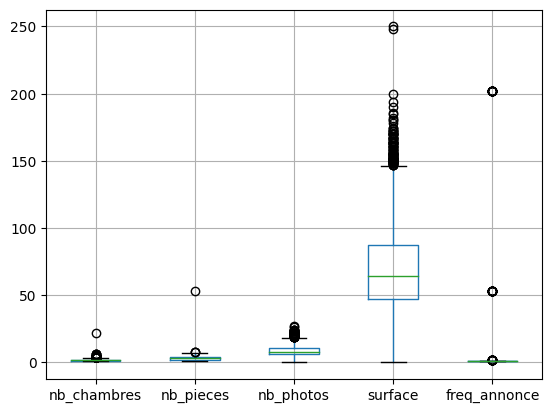

In [ ]:
df[numerical].boxplot()

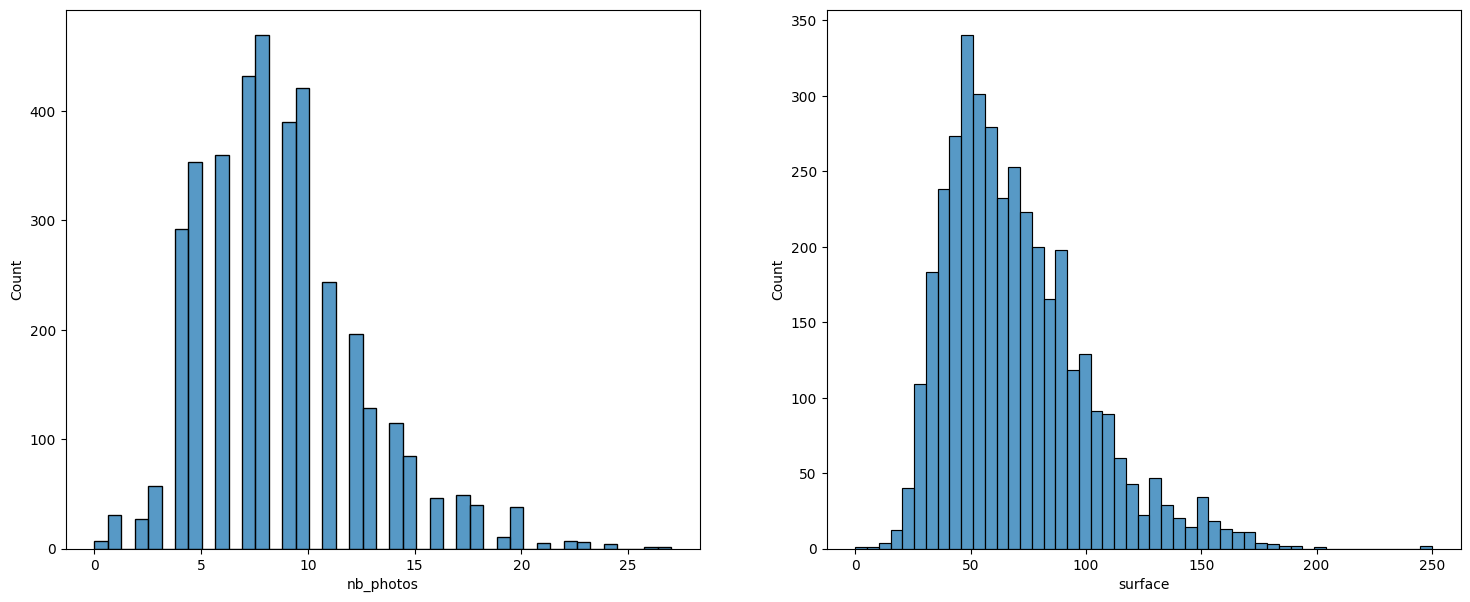

In [ ]:
plt.rcParams["figure.figsize"]

fig, axs = plt.subplots(1,2, figsize=(18,7))
for i, feature in enumerate(numerical[2:4]):
    sns.histplot(df[feature], ax = axs[i])
plt.show()

Les graphiques confirment cette aberration. On peut observer des 'outliers' (valeurs très extrêmes) par rapport à la moyenne.

In [ ]:
# Il semble que ce soit une erreur de saisie, c'est une donnée que
# nous n'allons pas utiliser car elle est eronnée.

df[df['nb_chambres'] == 22]

,number,codeinsee,codepostal,cp,etage,idagence,freq_annonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1236,0,750115,75015,75015,0,260996,1,282708,0,0,équipée,SL,1,22,4,3,0,567000,0,0,0,77.0,Appartement,Paris 15ème


In [ ]:
# Il semble que ce soit une erreur de saisie, c'est une donnée que
# nous n'allons pas utiliser car elle est eronnée.

df[df['nb_pieces'] == 53]

,number,codeinsee,codepostal,cp,etage,idagence,freq_annonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1318,18,750118,75018,75018,0,228375,1,261580,0,0,aucune,SL,1,2,12,53,18,580000,0,0,0,53.0,Appartement,Paris 18ème


In [ ]:
# Théoriquement, il ne devrait pas y avoir plus de chambres que de pièces
df[(df['nb_pieces'] - df['nb_chambres'] < 0)]

,number,codeinsee,codepostal,cp,etage,idagence,freq_annonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1,8,750110,75010,75010,0,12089,1,3765,0,0,aucune,SL,1,2,7,1,8,77500,0,0,0,8.49,Appartement,Paris 10ème
3,16,750110,75010,75010,0,12089,1,3765,0,0,aucune,SL,1,2,4,1,16,96000,0,0,0,10.26,Appartement,Paris 10ème
60,13,750110,75010,75010,0,12089,1,3765,0,0,aucune,SL,1,2,12,1,13,170000,0,0,0,18.75,Appartement,Paris 10ème
89,17,750108,75008,75008,0,7718,1,12356,0,0,équipée,SL,1,2,10,1,17,250000,0,0,0,17.00,Appartement,Paris 8ème
1236,0,750115,75015,75015,0,260996,1,282708,0,0,équipée,SL,1,22,4,3,0,567000,0,0,0,77.00,Appartement,Paris 15ème


In [ ]:
# Vendre une surface de 0 m2 pour 747 840 euros relève du génie.
# Plus serieusement, il semble que ce soit aussi une erreur de saisie.
df[df['surface'] < 8]

,number,codeinsee,codepostal,cp,etage,idagence,freq_annonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
2030,3,750116,75016,75016,0,76979,1,108380,0,0,categorie_0,SL,1,1,6,4,3,747840,0,0,0,0.0,Appartement,Paris 16ème


In [ ]:
# les index problématiques sont 1, 3, 60, 80, 1236, 1318 et 2030
# nous allons les retirer.
df.drop([1, 3, 60, 80, 1236, 1318, 2030], axis = 0, inplace = True)

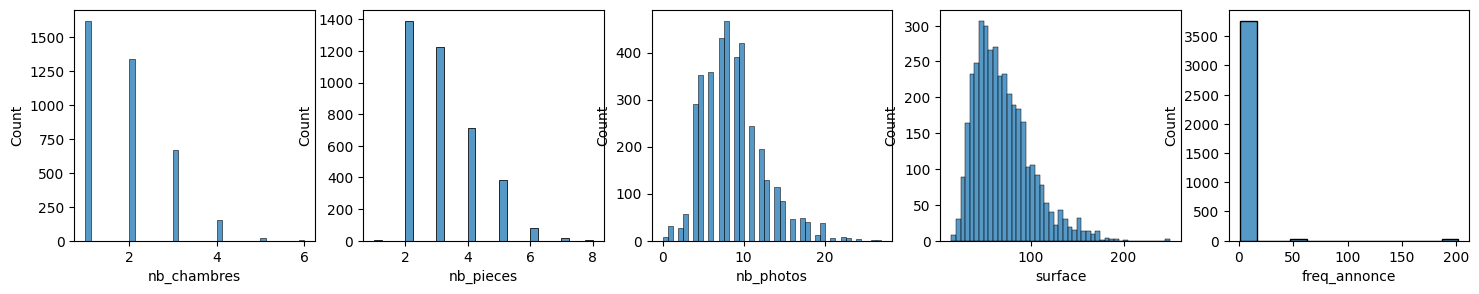

In [ ]:
# Distribution des variables quantitatives

plt.rcParams["figure.figsize"]

fig, axs = plt.subplots(1,5, figsize=(18,3))
for i, feature in enumerate(numerical):
    sns.histplot(df[feature], ax = axs[i])
plt.show()

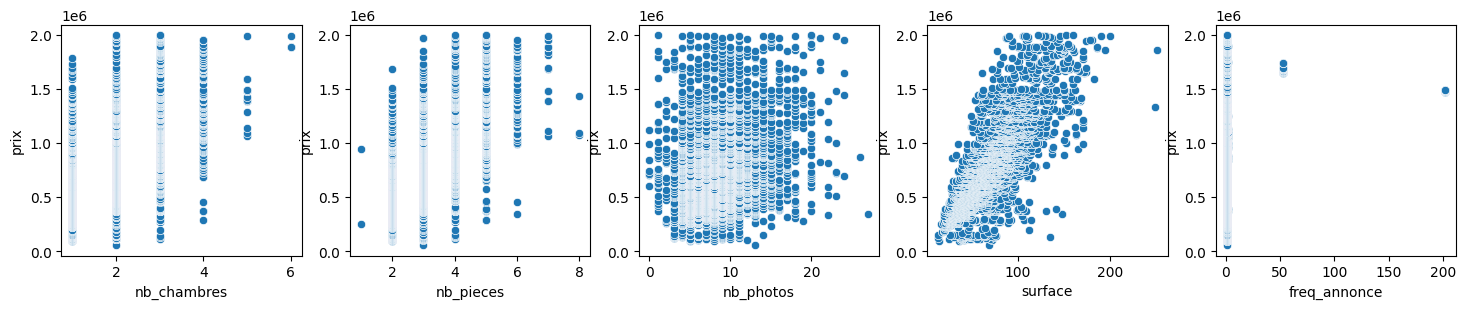

In [ ]:
# Prix en fonction des différentes variabes quantitatives

fig, axs = plt.subplots(1,5, figsize=(18,3))
for i, feature in enumerate(numerical):
    sns.scatterplot(x = df[feature], y = df['prix'], ax = axs[i])
plt.show()

A priori le prix semble fortement corrélé à la surface et dans une moindre mesure au nombre de pièces

In [ ]:
# Matrice de corrélations entre les variables quantitatives
df[numerical + ['prix']].corr()

,nb_chambres,nb_pieces,nb_photos,surface,freq_annonce,prix
nb_chambres,1.000000,0.897334,0.129779,0.774380,0.082382,0.558433
nb_pieces,0.897334,1.000000,0.162015,0.849735,0.102944,0.644636
nb_photos,0.129779,0.162015,1.000000,0.198025,0.040780,0.243596
surface,0.774380,0.849735,0.198025,1.000000,0.135409,0.792870
freq_annonce,0.082382,0.102944,0.040780,0.135409,1.000000,0.168136
prix,0.558433,0.644636,0.243596,0.792870,0.168136,1.000000


## Analyse des variables qualitatives

In [ ]:
df[[c for c in categorical if c not in to_remove]].nunique()

si_balcon                             2
typedebien                            2
idtypepublicationsourcecouplage       3
naturebien                            3
idtypecuisine                        10
ville                               112
idagence                           1412
position                             20
dtype: int64

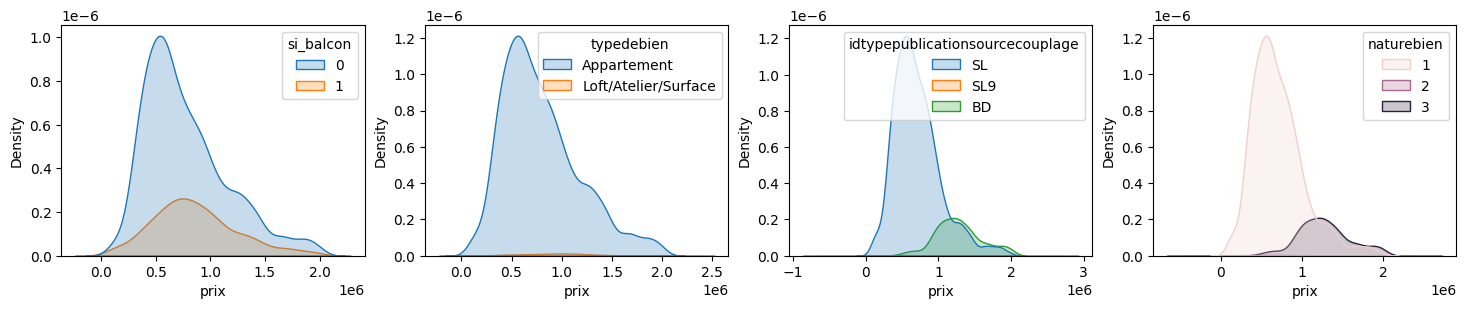

In [ ]:
# On peut déja commencer pas visualiser les variables qui n'ont pas beaucoup de modalités (qui ont des cardinalités faibles).

categorical_sub = ['si_balcon', 'typedebien', 'idtypepublicationsourcecouplage', 'naturebien']
fig, axs = plt.subplots(1, 4, figsize=(18,3))
for i, feature in enumerate(categorical_sub):
    sns.kdeplot(data = df, x="prix", hue = feature, fill=True, ax = axs[i])

plt.show()

## Feature Engineering

In [ ]:
# Ici, pour la variable ville, nous allons distinguer entre les arrondissement de Paris et la banlieue.
# Il s'agit d'un regroupement très grossier, mais nous allons faire cela en première approximation.
df['ville'] = df['ville'].apply(lambda x: x if x.startswith('Paris') else 'Banlieue')
df['ville'].value_counts()

Paris 16ème    441
Paris 18ème    307
Paris 15ème    295
Paris 17ème    291
Paris 13ème    276
Paris 19ème    210
Paris 11ème    195
Paris 14ème    193
Paris 20ème    193
Paris 10ème    164
Paris 6ème     163
Paris 12ème    161
Paris 7ème     143
Paris 8ème     129
Banlieue       120
Paris 5ème     115
Paris 4ème     109
Paris 9ème      99
Paris 3ème      96
Paris 2ème      64
Paris 1er       44
Name: ville, dtype: int64

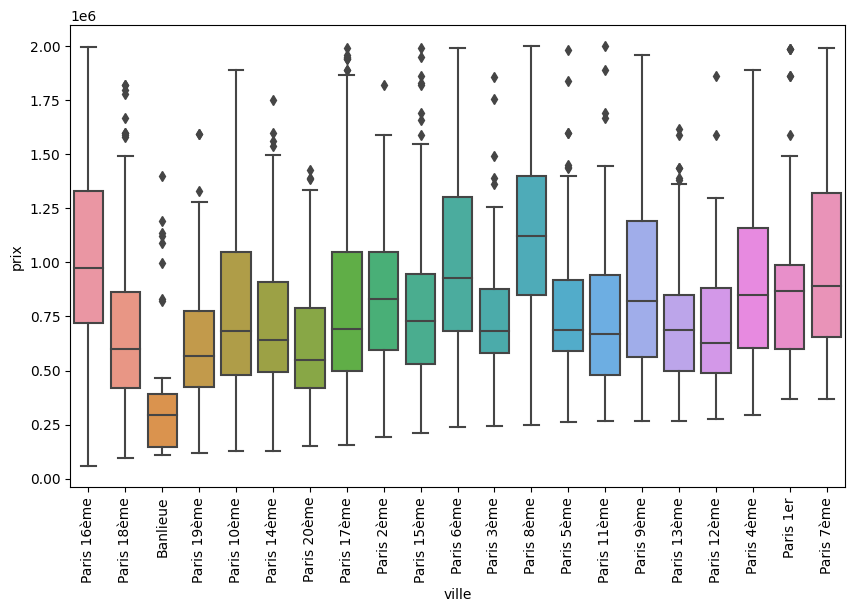

In [ ]:
# On peut s'aider des boites à moustaches pour visualiser la distribution du prix
# en fonction de la ville. La ville à clairement un impact sur le prix.

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y = df['prix'], x = df['ville'], ax = ax)
ax.tick_params(axis='x', rotation=90)

In [ ]:
# Pour la variable cuisine, voyons les valeures uniques qu'elle contient.
df['idtypecuisine'].unique()

array(['équipée', 'aucune', 'categorie_0', 'coin cuisine équipé',
       'coin cuisine', 'séparée', 'séparée équipée', 'américaine',
       'américaine équipée', 'catégorie_1'], dtype=object)

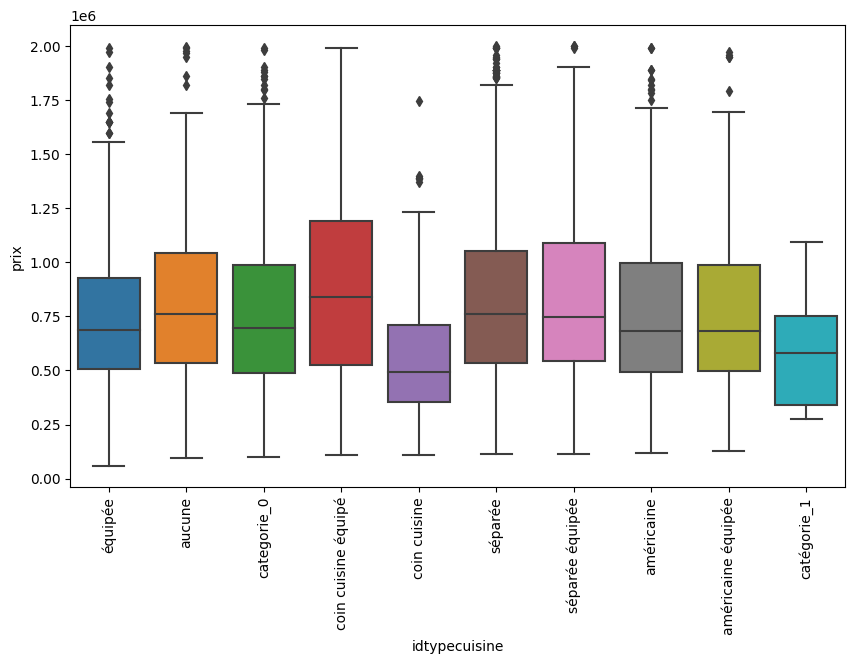

In [ ]:
# Voici la distribution du prix en fonction du type de cuisine
# On peut, par exemple essayer de regrouper les catégories qui semblent haut de gamme et les autres.

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y = df['prix'], x = df['idtypecuisine'], ax = ax)
ax.tick_params(axis='x', rotation=90)

In [ ]:
high_end = ['categorie_0', 'aucune', 'séparée équipée']
df['idtypecuisine'] = df['idtypecuisine'].apply(lambda x: 'gamme haute' if x in  high_end else 'autre')

dataset['idtypecuisine'].value_counts()

séparée                2073
categorie_0            1997
séparée équipée        1418
aucune                 1406
américaine équipée      748
équipée                 526
américaine              420
coin cuisine            186
coin cuisine équipé     114
catégorie_1              11
Name: idtypecuisine, dtype: int64

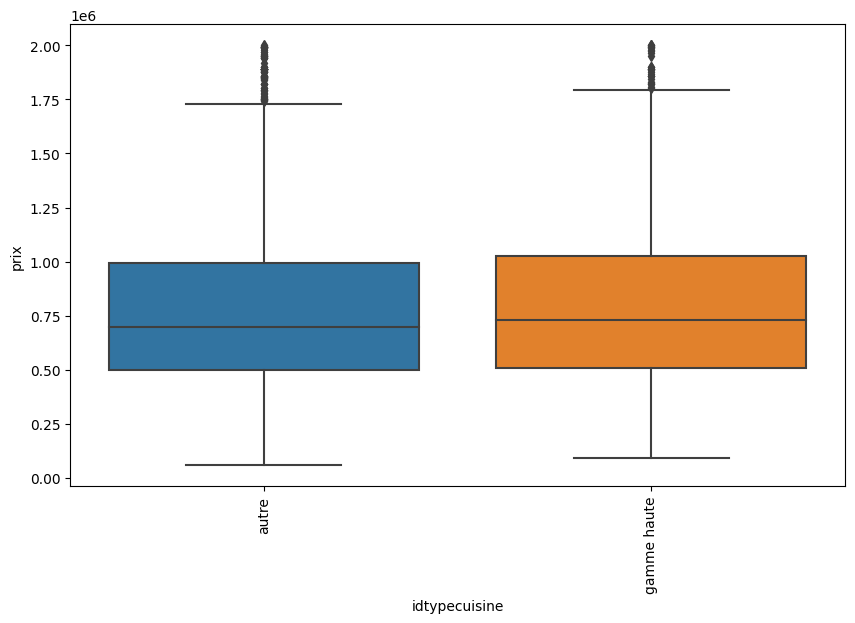

In [ ]:
# Voici la distribution après transformation

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y = df['prix'], x = df['idtypecuisine'], ax = ax)
ax.tick_params(axis='x', rotation=90)

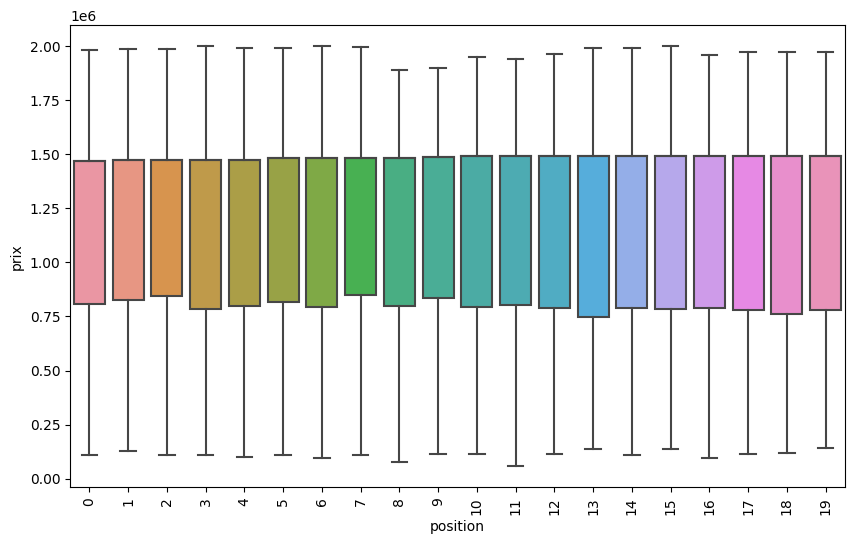

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y = dataset['prix'], x = dataset['position'], ax = ax)
ax.tick_params(axis='x', rotation=90)

La variable "position" ne semble pas être pertinente pour expliquer le prix.

# Quelles sont les variables qui expliquent le mieux le prix ?

In [ ]:
# On recupère uniquement les colonnes jugées pertinentes
to_remove = ['position', 'idagence', 'si_sdEau', 'si_sdbain', 'idtypechauffage', 'idtiers', 'etage', 'cp',
             'codepostal', 'codeinsee', 'idtypepublicationsourcecouplage', 'idtypecommerce']
to_keep = [col for col in df.columns if col not in (to_remove)]
df = df[to_keep]

print(df.shape)

(3808, 12)


In [ ]:
df.head()

,number,freq_annonce,idtypecuisine,naturebien,nb_chambres,nb_photos,nb_pieces,prix,si_balcon,surface,typedebien,ville
0,11,1,autre,1,2,13,3,59000,1,69.00,Appartement,Paris 16ème
2,6,1,gamme haute,1,1,8,2,94000,0,37.00,Appartement,Paris 18ème
4,4,1,gamme haute,1,1,5,2,100000,0,14.93,Appartement,Paris 16ème
5,0,1,autre,1,1,5,2,110000,0,38.65,Appartement,Banlieue
6,2,1,gamme haute,1,1,12,2,110000,1,41.57,Appartement,Banlieue


<ipython-input-53-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

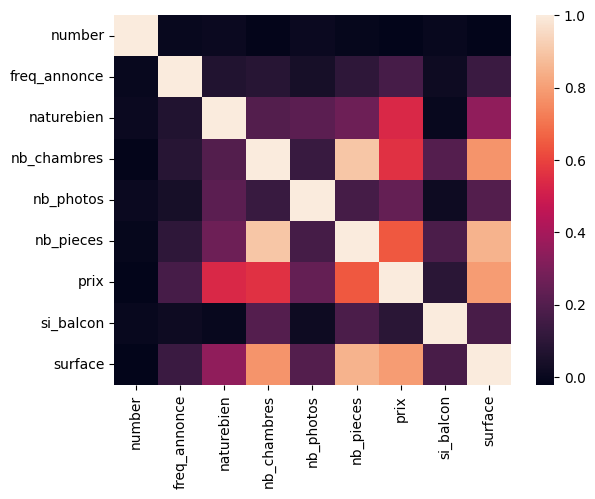

In [ ]:
sns.heatmap(df.corr())

In [ ]:
X = df[[col for col in df.columns if col != 'prix']]

y = df['prix']

X.shape, y.shape

((3808, 11), (3808,))

In [ ]:
df.columns

Index(['number', 'freq_annonce', 'idtypecuisine', 'naturebien', 'nb_chambres',
       'nb_photos', 'nb_pieces', 'prix', 'si_balcon', 'surface', 'typedebien',
       'ville'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.compose import ColumnTransformer


numerical = ['number', 'freq_annonce', 'nb_chambres', 'nb_photos', 'nb_pieces', 'surface']
categorical = ['idtypecuisine', 'naturebien', 'si_balcon', 'typedebien', 'ville']

continuous_index_cols = X.columns.get_indexer(numerical)
categorical_index_cols = X.columns.get_indexer(categorical)

ct = ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), categorical_index_cols),
        ("Scaler", StandardScaler(), continuous_index_cols)
    ])


In [ ]:
X = ct.fit_transform(X)
X.shape

(3808, 31)

In [ ]:
X = pd.DataFrame(X.todense(), columns = ct.get_feature_names_out()).set_index(y.index)
X.head()

,OneHotEncoder__idtypecuisine_gamme haute,OneHotEncoder__naturebien_2,OneHotEncoder__naturebien_3,OneHotEncoder__si_balcon_1,OneHotEncoder__typedebien_Loft/Atelier/Surface,OneHotEncoder__ville_Paris 10ème,OneHotEncoder__ville_Paris 11ème,OneHotEncoder__ville_Paris 12ème,OneHotEncoder__ville_Paris 13ème,OneHotEncoder__ville_Paris 14ème,OneHotEncoder__ville_Paris 15ème,OneHotEncoder__ville_Paris 16ème,...,OneHotEncoder__ville_Paris 4ème,OneHotEncoder__ville_Paris 5ème,OneHotEncoder__ville_Paris 6ème,OneHotEncoder__ville_Paris 7ème,OneHotEncoder__ville_Paris 8ème,OneHotEncoder__ville_Paris 9ème,Scaler__number,Scaler__freq_annonce,Scaler__nb_chambres,Scaler__nb_photos,Scaler__nb_pieces,Scaler__surface
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.248016,-0.089082,0.172142,1.138501,-0.094348,-0.026573
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.619880,-0.089082,-0.950316,-0.189506,-0.999331,-1.083222
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.967039,-0.089082,-0.950316,-0.986310,-0.999331,-1.811979
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.661356,-0.089082,-0.950316,-0.986310,-0.999331,-1.028738
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.314197,-0.089082,-0.950316,0.872899,-0.999331,-0.932319


## Régression linéaire

La régression linéaire s'écrit :

$$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +... + \beta_p x_p$$

Elle peut être réécrite sous une forme vectorielle :

$$\mathbf{y} = \mathbf{X}\beta$$

où $X$ est est appelée matrice de design.

$$\mathbf{X} =
\begin{pmatrix}
1 & x_1^1 & ... & x_p^1 \\
\vdots & \vdots & ... & \vdots \\
1 & x_1^n & ... & x_p^n
\end{pmatrix}$$

On peut montrer que si la matrice de design $X$ est de rang plein, alors :

$${\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

Standardisation :

$$ x = \frac{x-\bar{x}}{\sigma}$$

In [ ]:
import statsmodels.api as sm

X_reg = sm.add_constant(X)
model = sm.OLS(y, X_reg).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prix   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     553.4
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:58:54   Log-Likelihood:                -51124.
No. Observations:                3808   AIC:                         1.023e+05
Df Residuals:                    3776   BIC:                         1.025e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                           2.971e+05   1.56e+04     18.996      0.000    2.66e+05    3.28e+05
OneHotEncoder__idtypecuisine_gamme haute        1.149e+04   5597.365      2.054      0.040     520.405    2.25e+04
OneHotEncoder__naturebien_2                     1.333e+05   3.65e+04      3.655      0.000    6.18e+04    2.05e+05
OneHotEncoder__naturebien_3                      1.95e+05   8421.078     23.158      0.000    1.79e+05    2.12e+05
OneHotEncoder__si_balcon_1                      1.935e+04   6629.527      2.919      0.004    6355.491    3.24e+04
OneHotEncoder__typedebien_Loft/Atelier/Surface -8.551e+04   2.52e+04     -3.400      0.001   -1.35e+05   -3.62e+04
OneHotEncoder__ville_Paris 10ème                4.162e+05      2e+04     20.771      0.000    3.77e+05    4.55e+05
OneHotEncoder__ville_Paris 11ème                4.442e+05   1.94e+04     22.957      0.000    4.06e+05    4.82e+05
OneHotEncoder__ville_Paris 12ème                3.929e+05      2e+04     19.646      0.000    3.54e+05    4.32e+05
OneHotEncoder__ville_Paris 13ème                4.073e+05   1.81e+04     22.511      0.000    3.72e+05    4.43e+05
OneHotEncoder__ville_Paris 14ème                4.148e+05   1.93e+04     21.489      0.000    3.77e+05    4.53e+05
OneHotEncoder__ville_Paris 15ème                4.399e+05    1.8e+04     24.423      0.000    4.05e+05    4.75e+05
OneHotEncoder__ville_Paris 16ème                5.185e+05   1.74e+04     29.857      0.000    4.84e+05    5.53e+05
OneHotEncoder__ville_Paris 17ème                4.724e+05   1.81e+04     26.147      0.000    4.37e+05    5.08e+05
OneHotEncoder__ville_Paris 18ème                4.038e+05   1.79e+04     22.571      0.000    3.69e+05    4.39e+05
OneHotEncoder__ville_Paris 19ème                3.144e+05    1.9e+04     16.573      0.000    2.77e+05    3.52e+05
OneHotEncoder__ville_Paris 1er                  6.676e+05   2.95e+04     22.645      0.000     6.1e+05    7.25e+05
OneHotEncoder__ville_Paris 20ème                2.868e+05   1.93e+04     14.879      0.000    2.49e+05    3.25e+05
OneHotEncoder__ville_Paris 2ème                 5.246e+05   2.59e+04     20.292      0.000    4.74e+05    5.75e+05
OneHotEncoder__ville_Paris 3ème                 5.461e+05    2.3e+04     23.749      0.000    5.01e+05    5.91e+05
OneHotEncoder__ville_Paris 4ème                  6.01e+05   2.22e+04     27.114      0.000    5.58e+05    6.44e+05
OneHotEncoder__ville_Paris 5ème                 5.607e+05   2.17e+04     25.782      0.000    5.18e+05    6.03e+05
OneHotEncoder__ville_Paris 6ème                 7.142e+05   2.04e+04     34.949      0.000    6.74e+05    7.54e+05
OneHotEncoder__ville_Paris 7ème                 6.738e+05   2.09e+04     32.180      0.000   

- R-squared nous indique a quel point la droite de régression linéaire est ajustée aux données ; plus ce coefficient est proche de 1, mieux la droite est ajustée aux données.

- Les variables qui semblent être pertinentes pour la prédiction sont celles qui ont une p_value faible (colonne P>|t|):
    - la surface
    - la fréquence d'apparition de l'annonce
    - le nombre de photos
    - le nombre de chambres
    - si le bien se situe à Paris ou en banlieue
    - le type de bien

In [ ]:
X_nosurface = X.copy()
X_nosurface.drop('Scaler__surface', axis = 1, inplace = True)
X_reg = sm.add_constant(X_nosurface)
model = sm.OLS(y, X_reg).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prix   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     282.8
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:58:55   Log-Likelihood:                -52143.
No. Observations:                3808   AIC:                         1.043e+05
Df Residuals:                    3777   BIC:                         1.045e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                           2.441e+05   2.04e+04     11.972      0.000    2.04e+05    2.84e+05
OneHotEncoder__idtypecuisine_gamme haute        2.167e+04   7308.822      2.966      0.003    7345.254     3.6e+04
OneHotEncoder__naturebien_2                      1.12e+05   4.76e+04      2.352      0.019    1.86e+04    2.05e+05
OneHotEncoder__naturebien_3                     2.816e+05   1.08e+04     26.116      0.000     2.6e+05    3.03e+05
OneHotEncoder__si_balcon_1                      3.779e+04   8649.392      4.369      0.000    2.08e+04    5.48e+04
OneHotEncoder__typedebien_Loft/Atelier/Surface  7.351e+04   3.26e+04      2.254      0.024    9560.112    1.37e+05
OneHotEncoder__ville_Paris 10ème                 4.47e+05   2.62e+04     17.082      0.000    3.96e+05    4.98e+05
OneHotEncoder__ville_Paris 11ème                4.681e+05   2.53e+04     18.520      0.000    4.19e+05    5.18e+05
OneHotEncoder__ville_Paris 12ème                4.195e+05   2.61e+04     16.062      0.000    3.68e+05    4.71e+05
OneHotEncoder__ville_Paris 13ème                4.113e+05   2.36e+04     17.398      0.000    3.65e+05    4.58e+05
OneHotEncoder__ville_Paris 14ème                 4.37e+05   2.52e+04     17.327      0.000    3.88e+05    4.86e+05
OneHotEncoder__ville_Paris 15ème                4.633e+05   2.35e+04     19.694      0.000    4.17e+05    5.09e+05
OneHotEncoder__ville_Paris 16ème                6.098e+05   2.26e+04     27.012      0.000    5.66e+05    6.54e+05
OneHotEncoder__ville_Paris 17ème                4.865e+05   2.36e+04     20.609      0.000     4.4e+05    5.33e+05
OneHotEncoder__ville_Paris 18ème                4.173e+05   2.34e+04     17.853      0.000    3.71e+05    4.63e+05
OneHotEncoder__ville_Paris 19ème                 3.31e+05   2.48e+04     13.357      0.000    2.82e+05     3.8e+05
OneHotEncoder__ville_Paris 1er                  6.985e+05   3.85e+04     18.136      0.000    6.23e+05    7.74e+05
OneHotEncoder__ville_Paris 20ème                3.159e+05   2.52e+04     12.547      0.000    2.66e+05    3.65e+05
OneHotEncoder__ville_Paris 2ème                 5.484e+05   3.38e+04     16.238      0.000    4.82e+05    6.15e+05
OneHotEncoder__ville_Paris 3ème                 5.829e+05      3e+04     19.412      0.000    5.24e+05    6.42e+05
OneHotEncoder__ville_Paris 4ème                 6.448e+05   2.89e+04     22.282      0.000    5.88e+05    7.02e+05
OneHotEncoder__ville_Paris 5ème                 5.602e+05   2.84e+04     19.714      0.000    5.04e+05    6.16e+05
OneHotEncoder__ville_Paris 6ème                 7.274e+05   2.67e+04     27.247      0.000    6.75e+05     7.8e+05
OneHotEncoder__ville_Paris 7ème                 6.759e+05   2.74e+04     24.704      0.000   

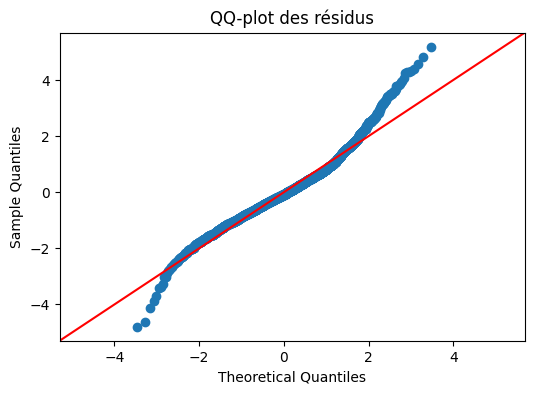

In [ ]:
import statsmodels.graphics.api as smg

residuals = model.resid

# Tracer le QQ-plot des résidus
fig, ax = plt.subplots(figsize=(6,4))
smg.qqplot(residuals, fit=True, line="45", ax=ax)
ax.set_title("QQ-plot des résidus")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg = RandomForestRegressor()

reg.fit(X, y)

RandomForestRegressor()

In [ ]:
def forest_importances(clf, features_name = None):
    if features_name is None:
        features_name = clf.get_feature_names_out()
    fi = pd.Series(clf.feature_importances_, index=features_name)
    fig, ax = plt.subplots(figsize = (10,8))

    #std = np.std([clf.feature_importances_ for tree in clf.estimators_], axis=0)
    fi.plot.bar(ax=ax)
    ax.set_title("importances des features avec la méthode MDI")
    ax.set_ylabel("decroissance moyenne de l'impurté")
    fig.tight_layout()

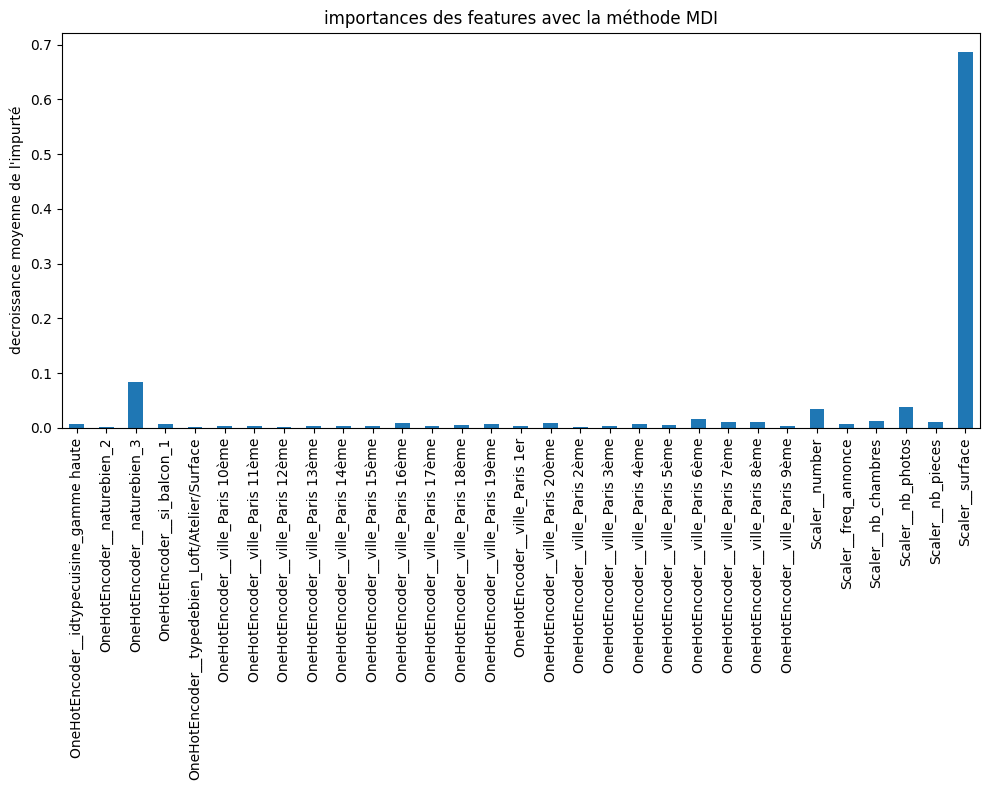

In [ ]:
forest_importances(reg, ct.get_feature_names_out())

- Le modèle random forest semble indiquer que la surface est la variable qui expliqude le mieux le prix, suivie de la variable qui concerne la nature du bien.

Il fauter noter ici que deux modèles différents (ici la régression linéaire et le random forest) peuvent donner des explications différentes.

# Prédire les prix

In [ ]:
# On sépare la variable cible y des autres variables.
X = df[[col for col in df.columns if col != 'prix']]
y = df['prix']

X.head()

,number,freq_annonce,idtypecuisine,naturebien,nb_chambres,nb_photos,nb_pieces,si_balcon,surface,typedebien,ville
0,11,1,autre,1,2,13,3,1,69.00,Appartement,Paris 16ème
2,6,1,gamme haute,1,1,8,2,0,37.00,Appartement,Paris 18ème
4,4,1,gamme haute,1,1,5,2,0,14.93,Appartement,Paris 16ème
5,0,1,autre,1,1,5,2,0,38.65,Appartement,Banlieue
6,2,1,gamme haute,1,1,12,2,1,41.57,Appartement,Banlieue


In [ ]:
# On utilise une fonction pour normaliser les variables quantitatives et pour faire du one-hot encoding
# pour les variables qualitatives

continuous_index_cols = X.columns.get_indexer(numerical)
categorical_index_cols = X.columns.get_indexer(categorical)

ct = ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), categorical_index_cols),
        ("Scaler", StandardScaler(), continuous_index_cols)
    ])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# On récupère les propriétés des données d'entrainement (on 'fit') et on transforme les données de test de la même manière
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

## Prédiction à l'aide d'une régression linéaire

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# La régression linéaire apprend sur les données d'entrainement
lr.fit(X_train, y_train)

# On prédit alors sur les données de test
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

# Les resultats

# calcul du coefficient de determination
r2 = lr.score(X_train, y_train)
# calcul de l'erreur moyenne quadratique
rmse = mean_squared_error(y_test, y_pred, squared = False)
# calcul de la correlation
corr = np.corrcoef(y_test, y_pred)[0,1]

print('Coefficient de détermination :', r2)
print('Racine erreur quadratique moyenne:', rmse)
print('Corrélation :', corr)

Coefficient de détermination : 0.821489625843116
Racine erreur quadratique moyenne: 164748.55006665437
Corrélation : 0.89892155205947


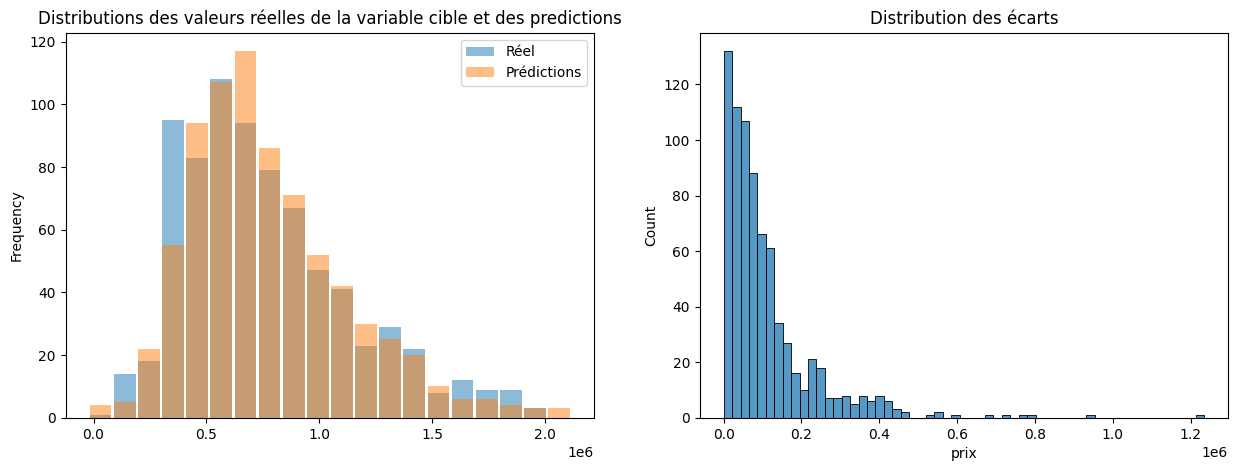

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
df_predictions = pd.DataFrame({'Réel':y_test, 'Prédictions' : y_pred})
df_predictions.plot.hist(ax = ax[0], bins = 20, rwidth=0.9, alpha = 0.5, title = 'Distributions des valeurs réelles de la variable cible et des predictions')
sns.histplot( np.abs(y_pred - y_test), ax = ax[1])
ax[1].set_title('Distribution des écarts')
plt.show()

## Prédiction à l'aide d'un random forest

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

# Définir les hyperparamètres à affiner
param_grid = {
    'n_estimators': [10, 50, 100, 200, 400],
    'max_depth': [4, 6, 8, 10, 12, 14, 16]
}

In [ ]:
# Effectuer une recherche de grille avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error',
                           verbose=2, n_jobs=-1)

# Ajuster le modèle aux données
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres
best_params = grid_search.best_params_


Fitting 5 folds for each of 35 candidates, totalling 175 fits


In [ ]:
# Évaluer le modèle ayant les meilleurs hyperparamètres sur l'ensemble de test
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Meilleurs hyperparamètres : {best_params}")
print(f"Racine erreur quadratique moyenne : {rmse}")

Meilleurs hyperparamètres : {'max_depth': 16, 'n_estimators': 200}
Racine erreur quadratique moyenne : 184120.96263946765
